<div style="display: flex; justify-content: center; align-items: center; height: 100vh;">
    <img src="https://curso.infnet.com.br/c/wp-content/uploads/sites/5/2022/12/Infnet-Logo.png" height="300" width="300">
</div>

<p><b><font size = 5 face = 'verdana'> Validação de modelos de clusterização [24E4_3] - PROJETO FINAL</font></b></p>
<p><font size = 3 face = 'verdana'>Trabalho apresentado à conclusão do curso de Validação de modelos de clusterização [24E4_3] do MIT em Inteligência Artificial, Machine Learning e Deep Learning, Instituto INFNET, como requisito parcial de avaliação. </font></b></p>
<p><font size = 3 face = 'verdana'><b>PROFESSOR:</b> CHARLES BEZERRA DO PRADO<br>
<b>ALUNO:</b> OSEMAR DA SILVA XAVIER<br>
<b>E-MAIL:</b> osemar.xavier@al.infnet.edu.br<br>
<b>GITHUB:</b>
<a href="https://www.kaggle">https://www.kaggle.</a>

</font></p>

<p><font size = 3 face = 'verdana'>
<hr></hr>


<hr></hr>
<h5><b>PARTE 1. INFRAESTRUTURA</b><br>
<p><font size = 2 face = 'verdana'>
<ol>
<li>Você está rodando em Python 3.9+</li>
<li>Você está usando um ambiente virtual: Virtualenv ou Anaconda</li>
<li>Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico</li>
<li>Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.</li>
<li>Tire um printscreen do ambiente que será usado rodando em sua máquina.
<li>Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle)</li>
Dica: Gere um relatório rico em gráficos que dêem respaldo aos resultados
</ol></font></b></p>
<hr></hr>


**IMPORTANDO AS BIBLIOTECAS QUE SERÃO UTILIZADAS NO PROJETO:**
<hr></hr>
<h5><b>BIBLIOTECAS E PACOTES UTILIZADOS</b></h5>
<p><font size=2 face='verdana'>

<ol>
  <li><b>Manipulação e Tratamento de Dados</b></li>
    - <b>`pandas`</b>: Manipulação de tabelas e dados.  
    - <b>`numpy`</b>: Suporte a cálculos numéricos e arrays.

  <li><b>Visualização de Dados</b></li>
    - <b>`seaborn`</b>: Criação de gráficos avançados e estatísticos.  
    - <b>`matplotlib.pyplot`</b>: Gráficos básicos e personalização de visualizações.

  <li><b>Pré-processamento</b></li>
    - <b>`StandardScaler`</b> (do `sklearn.preprocessing`): Normalização dos dados, ajustando a escala das variáveis para média zero e desvio padrão 1.

  <li><b>Algoritmos de Clusterização</b></li>
    - <b>`KMeans`</b> (do `sklearn.cluster`): Algoritmo de clusterização baseado em <b>partições</b> que busca minimizar a distância intra-cluster.  
    - <b>`DBSCAN`</b> (do `sklearn.cluster`): Algoritmo de clusterização baseado em <b>densidade</b>, que detecta clusters de formatos irregulares e identifica <b>ruídos</b>.

  <li><b>Validação dos Clusters</b></li>
    - <b>`silhouette_score`</b>: Métrica para avaliar a qualidade dos clusters com base na <b>coesão</b> e <b>separação</b>.  
    - <b>`davies_bouldin_score`</b>: Índice que mede a <b>separação</b> entre clusters. Quanto <b>menor</b>, melhor.  
    - <b>`calinski_harabasz_score`</b>: Índice que mede a relação entre a <b>dispersão intra-cluster</b> e <b>inter-cluster</b>. Quanto <b>maior</b>, melhor.

</ol>
</font></p>
<hr></hr>



In [ ]:
# Manipulação e tratamento de dados
import pandas as pd
import numpy as np
import subprocess
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


**1.1. Você está rodando em Python 3.9+**

In [ ]:
print("Versão do Python:", sys.version)

Versão do Python: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]


**1.2. Você está usando um ambiente virtual: Virtualenv ou Anaconda**

In [ ]:
print("Ambiente virtual ativo:", sys.prefix)

Ambiente virtual ativo: /usr


**1.3. Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico** <br>
Sim.

**1.4. Gera o arquivo requirements.txt com os pacotes instalados**

In [ ]:
with open("requirements.txt", "w") as file:
    subprocess.run(["python", "-m", "pip", "freeze"], stdout=file)
print("Arquivo requirements.txt gerado com sucesso.")

Arquivo requirements.txt gerado com sucesso.


**1.5. Tire um printscreen do ambiente que será usado rodando em sua máquina.**

<hr></hr>
<h5><b>PARTE 2. ESCOLHA DA BASE DE DADOS</b><br>
<p><font size = 2 face = 'verdana'>
<ol>
<li>Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.</li>
<li>Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.</li>
<li>Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?</li>
<li>Realize o pré-processamento adequado dos dados. Descreva os passos necessários.</li>
</ol></font></b></p>

<div style="display: flex; justify-content: center; align-items: center; height: 100vh;">
    <img src="https://raw.githubusercontent.com/oserxavier/Machine-Learning/refs/heads/main/figures/penguin.PNG" height="350" width="600">
</div>

<hr></hr>
<h5><b>2.1. Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.</b></h5>
<p><font size=2 face='verdana'>
A base de dados escolhida foi <b>Penguins Dataset</b>, disponibilizada pela biblioteca <b>Seaborn</b> em Python. A base de dados contém informações físicas de três espécies de pinguins coletadas em ilhas da Antártica: Adelie, Chinstrap e Gentoo. Ela é adequada para um problema de clusterização porque inclui variáveis **contínuas** que permitem agrupar os indivíduos com base em características físicas como o tamanho do bico, comprimento das asas e massa corporal.<br>

</font></b></p>
<hr></hr>

<b>2. Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.</b>
<p><font size = 2 face = 'verdana'>

<b>2.1. MOTIVAÇÃO:</b>
<li>Identificar padrões de agrupamento entre as espécies de pinguins pode ajudar a entender as diferenças morfológicas e fornecer insights biológicos sobre suas adaptações.</li>
<li>É um conjunto de dados simples e ideal para testar técnicas de clusterização como <b>K-Means</b> e <b>DBSCAN</b>.</li>

<hr></hr>

<p><font size = 2 face = 'verdana'>
<b>2.2. OBJETIVO:</b>
<li>Dividir os pinguins em clusters representativos para compreender diferenças morfológicas entre as espécies.</li>
<li>Explorar como variáveis como <b>comprimento do bico (bill_length_mm)</b>, <b>profundidade do bico (bill_depth_mm)</b>, <b>comprimento das asas (flipper_length_mm)</b> e <b>massa corporal (body_mass_g)</b> influenciam os padrões de agrupamento.</li>
</font></b></p>
<hr></hr>






In [ ]:
# 1. Carregar o dataset Penguins
penguins = sns.load_dataset("penguins")

In [ ]:
# Imprime as primeira 5 linhas do dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
# Verificar valores nulos no dataset
print("Valores nulos por coluna no dataset:")
print(penguins.isnull().sum())

Valores nulos por coluna no dataset:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [ ]:
# 2. Tratar valores ausentes
# Remover linhas com valores nulos
penguins_clean = penguins.dropna()
penguins_clean.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


<hr></hr>
<h5><b>2.3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização.</b></h5>
<p><font size=2 face='verdana'>
</font></b></p>

<p><font size=2 face='verdana'>

Para entender melhor a faixa dinâmica das variáveis do dataset **Penguins**, foram gerados gráficos de histogramas, boxplots e uma matriz de correlação. As variáveis utilizadas para as tarefas de clusterização foram:

<li><b>bill_length_mm</b>: Comprimento do bico (em mm)</li>  
<li><b>bill_depth_mm</b>: Profundidade do bico (em mm)  </li>
<li><b>flipper_length_mm</b>: Comprimento das asas (em mm)  </li>
<li><b>body_mass_g</b>: Massa corporal (em gramas)  </li>
</font></p>
<hr></hr>

<h5><b>Gráficos Gerados</b></h5>

  <li><b>Histogramas</b></li>
    - Os histogramas mostraram a distribuição das variáveis, evidenciando a dispersão e possíveis concentrações de valores.  
    - Por exemplo, os valores de **body_mass_g** variam entre 3.000 e 6.000 gramas, enquanto **bill_length_mm** varia entre aproximadamente 30 e 60 mm.  

  <li><b>Boxplots</b></li>
    - Os boxplots compararam as distribuições das variáveis entre as três espécies de pinguins (Adelie, Chinstrap e Gentoo).  
    - Observou-se que algumas variáveis, como **bill_length_mm** e **flipper_length_mm**, apresentam diferenças significativas entre as espécies, o que é útil para a clusterização.  

  <li><b>Matriz de Correlação</b></li>
    - A matriz de correlação destacou as relações entre as variáveis numéricas.  
    - Por exemplo, **flipper_length_mm** e **body_mass_g** apresentaram uma correlação positiva forte, indicando que pinguins com asas maiores tendem a ser mais pesados.  

<hr></hr>

<h5><b>Análise dos Resultados</b></h5>

  <li>Os gráficos indicaram que as variáveis têm escalas e distribuições diferentes. Variáveis como **bill_length_mm** possuem faixas menores em comparação com **body_mass_g**.</li>
  <li>Foi possível observar algumas discrepâncias nos dados, como possíveis outliers, especialmente em variáveis como **body_mass_g**.</li>

<hr></hr>
<h5><b>O que deve ser feito antes da etapa de clusterização?</b></h5>

  <li><b>Normalização dos Dados</b>: Como os algoritmos de clusterização, como K-Means, são sensíveis à escala das variáveis, foi necessário aplicar a normalização usando o <b>StandardScaler</b>. Isso transformou os dados para uma escala com média zero e desvio padrão 1.</li>
  <li><b>Tratamento de Valores Ausentes</b>: As linhas com valores nulos foram removidas utilizando o método `dropna()` para garantir a integridade dos dados.</li>


<p><font size=2 face='verdana'>
</font></b></p>



Gráfico de Dispersão entre Variáveis Numéricas


<Figure size 1000x600 with 0 Axes>

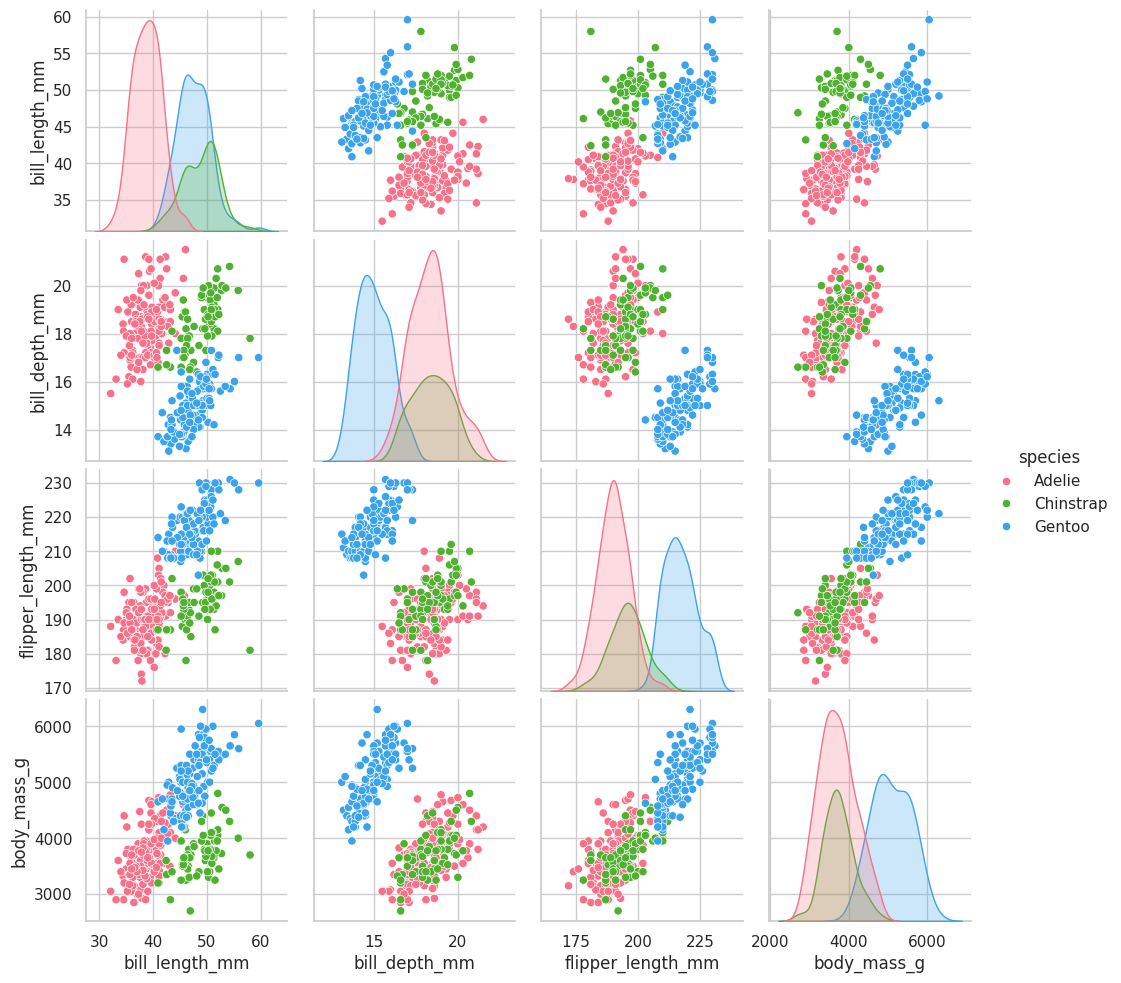

In [ ]:
# Configurações gerais dos gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# 1. Gráfico de dispersão entre variáveis
print("Gráfico de Dispersão entre Variáveis Numéricas")
sns.pairplot(penguins_clean, hue="species", palette="husl", diag_kind="kde")
plt.show()

Histogramas das Variáveis Numéricas


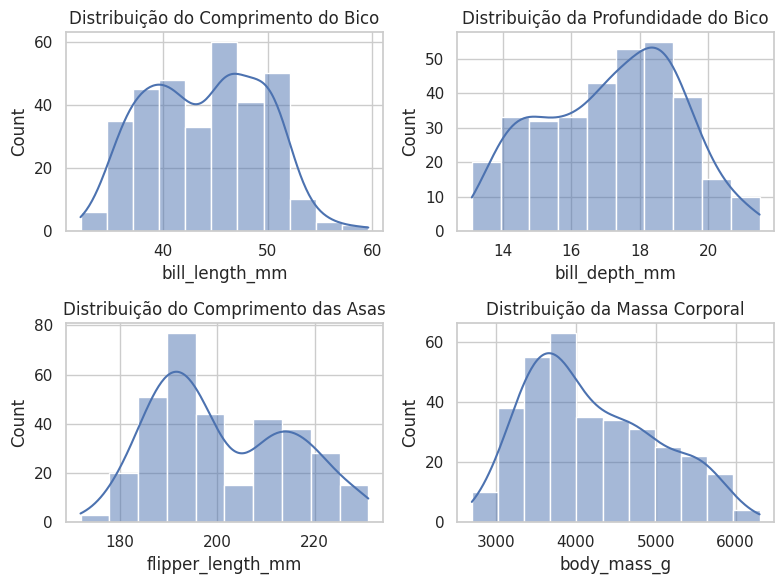

In [ ]:
# 2. Histogramas das variáveis numéricas
print("Histogramas das Variáveis Numéricas")
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

sns.histplot(penguins_clean['bill_length_mm'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribuição do Comprimento do Bico")

sns.histplot(penguins_clean['bill_depth_mm'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribuição da Profundidade do Bico")

sns.histplot(penguins_clean['flipper_length_mm'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribuição do Comprimento das Asas")

sns.histplot(penguins_clean['body_mass_g'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribuição da Massa Corporal")

plt.tight_layout()
plt.show()

Boxplots Comparando Espécies


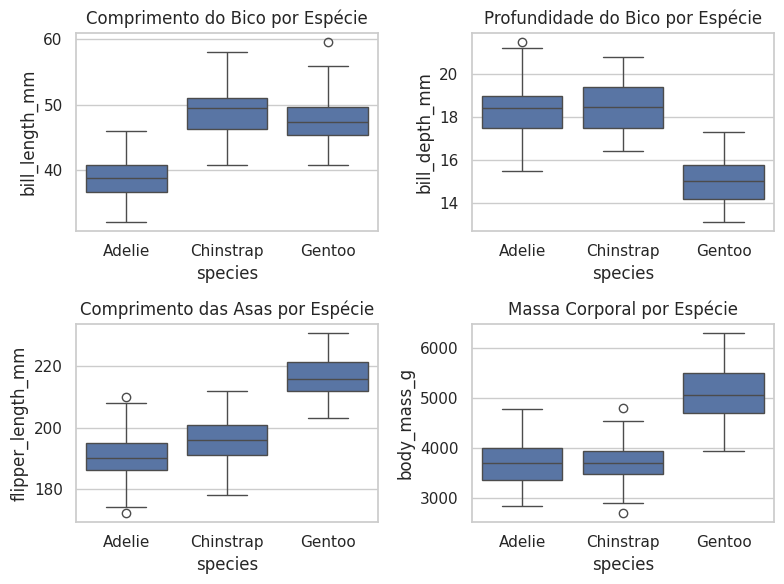

In [ ]:
# 3. Boxplots para comparação entre espécies
print("Boxplots Comparando Espécies")
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

sns.boxplot(x="species", y="bill_length_mm", data=penguins_clean, ax=axes[0, 0])
axes[0, 0].set_title("Comprimento do Bico por Espécie")

sns.boxplot(x="species", y="bill_depth_mm", data=penguins_clean, ax=axes[0, 1])
axes[0, 1].set_title("Profundidade do Bico por Espécie")

sns.boxplot(x="species", y="flipper_length_mm", data=penguins_clean, ax=axes[1, 0])
axes[1, 0].set_title("Comprimento das Asas por Espécie")

sns.boxplot(x="species", y="body_mass_g", data=penguins_clean, ax=axes[1, 1])
axes[1, 1].set_title("Massa Corporal por Espécie")

plt.tight_layout()
plt.show()

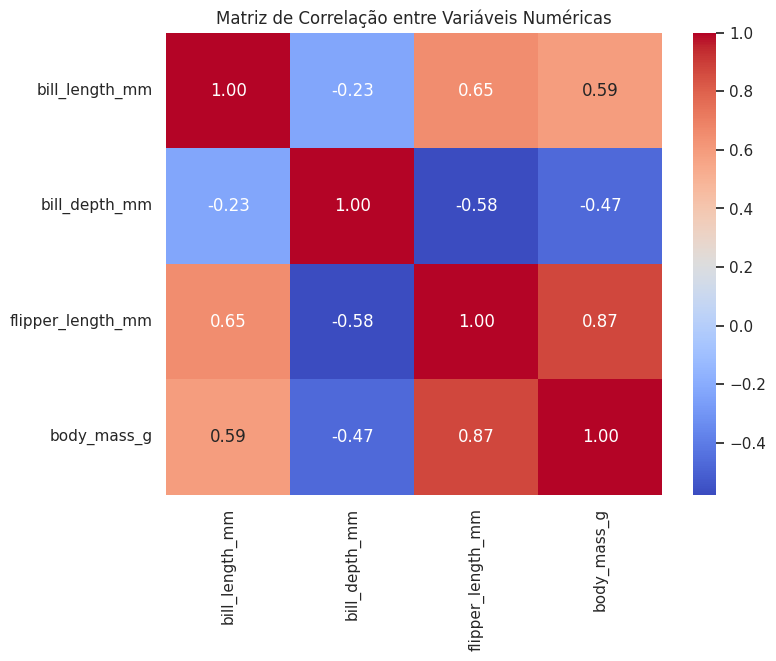

In [ ]:
# Selecionar apenas colunas numéricas
penguins_numeric = penguins_clean.select_dtypes(include=["float64", "int64"])

# Calcular a matriz de correlação
correlation_matrix = penguins_numeric.corr()

# Gráfico de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()


<hr></hr>
<h5><b>2.4. Realize o pré-processamento adequado dos dados. Descreva os passos necessários.</b></h5>
<p><font size=2 face='verdana'>

Para garantir que os dados estivessem prontos para as tarefas de clusterização, foi realizado um pré-processamento adequado. Os passos necessários incluíram:

  <li><b>Carregamento dos Dados</b></li>
    - O dataset <b>Penguins</b> foi carregado utilizando a biblioteca <b>Seaborn</b>:
      ```python
      import seaborn as sns
      penguins = sns.load_dataset("penguins")
      ```

  <li><b>Tratamento de Valores Ausentes</b></li>
    - Foi identificado que o dataset continha valores nulos em algumas colunas.
    - Para evitar problemas durante a clusterização, as linhas com valores nulos foram removidas usando o método <b>dropna()</b>:
      ```python
      penguins_clean = penguins.dropna()
      ```
    - Esse passo garantiu que todas as análises fossem feitas com dados completos e consistentes.

  <li><b>Seleção de Variáveis Numéricas</b></li>
    - Foram selecionadas apenas as colunas <b>numéricas</b> relevantes para a clusterização:
      - <b>bill_length_mm</b>: Comprimento do bico  
      - <b>bill_depth_mm</b>: Profundidade do bico  
      - <b>flipper_length_mm</b>: Comprimento das asas  
      - <b>body_mass_g</b>: Massa corporal  
    - Código utilizado:
      ```python
      features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
      penguins_data = penguins_clean[features]
      ```

  <li><b>Normalização dos Dados</b></li>
    - Como as variáveis têm escalas diferentes (ex.: milímetros vs gramas), foi aplicado o método <b>StandardScaler</b> do <b>sklearn</b> para normalização.
    - A normalização ajusta os dados para uma distribuição com média <b>zero</b> e desvio padrão <b>1</b>:
      ```python
      from sklearn.preprocessing import StandardScaler

      scaler = StandardScaler()
      penguins_scaled = scaler.fit_transform(penguins_data)
      ```

    - O resultado foi convertido em um <b>DataFrame</b> para facilitar a interpretação:
      ```python
      import pandas as pd
      penguins_normalized = pd.DataFrame(penguins_scaled, columns=features)
      ```

  <li><b>Verificação dos Dados</b></li>
    - Após o pré-processamento, foi feita uma verificação para garantir que os dados estavam normalizados e sem valores ausentes.
    - Código para visualizar os primeiros registros:
      ```python
      print(penguins_normalized.head())
      ```

<hr></hr>

<h5><b>Resumo dos Passos</b></h5>

  <li>Carregamento do dataset utilizando <b>Seaborn</b>.</li>
  <li>Tratamento de valores ausentes com <b>dropna()</b>.</li>
  <li>Seleção de colunas numéricas relevantes para a análise.</li>
  <li>Normalização dos dados utilizando <b>StandardScaler</b>.</li>

</font></p>
<hr></hr>


In [ ]:
# Selecionar apenas as colunas numéricas para clusterização
features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
penguins_data = penguins_clean[features]

In [ ]:
# 3. Normalizar os dados usando StandardScaler
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_data)

In [ ]:
# Converter o resultado em DataFrame para melhor visualização
penguins_normalized = pd.DataFrame(penguins_scaled, columns=features)

# Exibir os primeiros registros
print("Dados Normalizados:")
print(penguins_normalized.head())

Dados Normalizados:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.896042       0.780732          -1.426752    -0.568475
1       -0.822788       0.119584          -1.069474    -0.506286
2       -0.676280       0.424729          -0.426373    -1.190361
3       -1.335566       1.085877          -0.569284    -0.941606
4       -0.859415       1.747026          -0.783651    -0.692852


<hr></hr>
<h5><b>PARTE 3. CLUSTERIZAÇÃO</b><br>
<p><font size = 2 face = 'verdana'>
<ol>
<li>Realizar o agrupamento dos dados, escolhendo o número ótimo de clusters. Para tal, use o índice de silhueta e as técnicas: <b>K-Médias</b>/ <b>DBScan</b></li>
<li>Com os resultados em mão, descreva o processo de mensuração do índice de silhueta. Mostre o gráfico e justifique o número de clusters escolhidos.</li>
<li>Compare os dois resultados, aponte as semelhanças e diferenças e interprete.</li>
<li>Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos.</li>
<li>Realizando a análise, responda: A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan</li>
</ol></font></b></p>

In [ ]:
# ---------- 1. K-MÉDIAS (K-MEANS) ----------
# Lista para armazenar os índices de silhueta
silhouette_scores = []
k_range = range(2, 7)  # Testando de 2 a 6 clu

In [ ]:
# Iterar sobre diferentes valores de K
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(penguins_scaled)
    score = silhouette_score(penguins_scaled, labels)
    silhouette_scores.append(score)

Valores de K: [2, 3, 4, 5, 6]
Índices de Silhueta: [0.5308173701641073, 0.446192544665462, 0.39820643145014184, 0.3744001238501791, 0.36416493341229644]


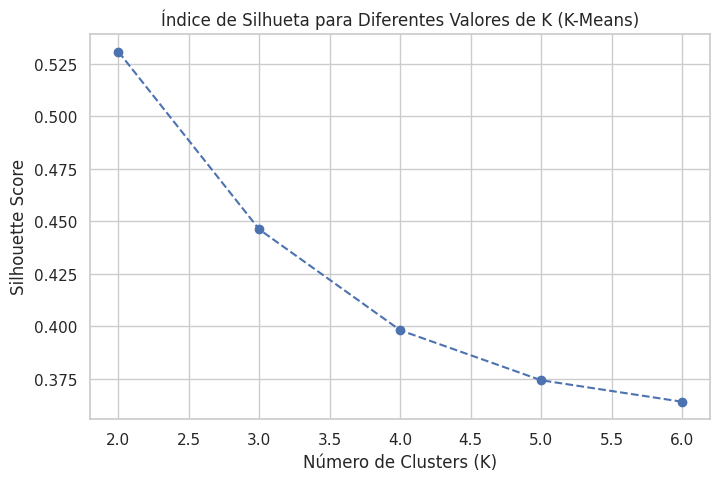

In [ ]:
# Garantir que silhouette_scores é limpo antes do loop
silhouette_scores = []

# Iterar sobre os valores de K no intervalo correto
k_range = list(range(2, 7))  # Testando K de 2 a 6
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(penguins_scaled)
    score = silhouette_score(penguins_scaled, labels)
    silhouette_scores.append(score)

# Verificar se os tamanhos de k_range e silhouette_scores coincidem
print("Valores de K:", k_range)
print("Índices de Silhueta:", silhouette_scores)

# Plotar os valores do índice de silhueta
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title("Índice de Silhueta para Diferentes Valores de K (K-Means)")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()


<hr></hr>
<h5><b>3. Realizar o agrupamento dos dados, escolhendo o número ótimo de clusters. Para tal, use o índice de silhueta e as técnicas: K-Médias/ DBScan</b></h5>
<h5><b>3.1. Análise do Número Ótimo de Clusters</b></h5>
<p><font size=2 face='verdana'>

Com base no índice de silhueta gerado para diferentes valores de clusters no algoritmo <b>K-Médias</b>, as seguintes observações foram feitas:

  <li><b>Interpretação do Índice de Silhueta</b></li>
    - O índice de silhueta mede a qualidade dos clusters:
      - Valores próximos de <b>1</b> indicam que os clusters estão bem definidos (alta separação e coesão).
      - Valores próximos de <b>0</b> sugerem sobreposição entre os clusters.
      - Valores negativos indicam agrupamentos mal definidos.

  <li><b>Resultados Obtidos</b></li>
    - O índice de silhueta foi calculado para valores de <b>K</b> no intervalo de 2 a 6:

      K = 2: 0.530
      K = 3: 0.446
      K = 4: 0.398
      K = 5: 0.374
      K = 6: 0.364

    - O valor mais alto do índice de silhueta foi observado em <b>K = 2</b>, indicando que esse número de clusters proporciona a melhor qualidade de agrupamento.

  <li><b>Análise Gráfica</b></li>
    - O gráfico mostra uma <b>diminuição gradual</b> no índice de silhueta à medida que <b>K</b> aumenta.  
    - Isso sugere que aumentar o número de clusters fragmenta os grupos naturais, reduzindo a coesão e a separação.

<h5><b>Conclusão</b></h5>
  <li>O <b>número ótimo de clusters</b> é <b>K = 2</b>, pois apresenta o maior índice de silhueta (<b>0.530</b>).</li>
  <li>Esse resultado indica que os dados possuem <b>dois agrupamentos principais</b> bem definidos.</li>

</font></p>
<hr></hr>


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Lista para armazenar os resultados do índice de silhueta
eps_values = np.arange(0.2, 1.2, 0.2)  # Testando valores de eps entre 0.2 e 1.0
min_samples_values = [2, 3, 4, 5]      # Testando diferentes valores de min_samples

best_eps = 0
best_min_samples = 0
best_silhouette = -1

# Iterar sobre diferentes combinações de eps e min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(penguins_scaled)

        # Filtrar apenas clusters válidos (excluindo ruídos com rótulo -1)
        valid_dbscan_labels = dbscan_labels[dbscan_labels != -1]
        valid_dbscan_data = penguins_scaled[dbscan_labels != -1]

        # Calcular o índice de silhueta somente se houver mais de 1 cluster válido
        if len(set(valid_dbscan_labels)) > 1:
            silhouette = silhouette_score(valid_dbscan_data, valid_dbscan_labels)
            print(f"eps={eps}, min_samples={min_samples}, Índice de Silhueta: {silhouette:.4f}")

            # Atualizar o melhor índice de silhueta
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_eps = eps
                best_min_samples = min_samples

# Resultado final
if best_silhouette > -1:
    print(f"\nMelhores Parâmetros para DBSCAN:")
    print(f"eps = {best_eps}, min_samples = {best_min_samples}, Índice de Silhueta = {best_silhouette:.4f}")
else:
    print("DBSCAN não encontrou clusters válidos.")


eps=0.2, min_samples=2, Índice de Silhueta: 0.6412
eps=0.2, min_samples=3, Índice de Silhueta: 0.4789
eps=0.4, min_samples=2, Índice de Silhueta: -0.0415
eps=0.4, min_samples=3, Índice de Silhueta: 0.0554
eps=0.4, min_samples=4, Índice de Silhueta: 0.3606
eps=0.4, min_samples=5, Índice de Silhueta: 0.3232
eps=0.6000000000000001, min_samples=2, Índice de Silhueta: 0.3123
eps=0.6000000000000001, min_samples=3, Índice de Silhueta: 0.5534
eps=0.6000000000000001, min_samples=4, Índice de Silhueta: 0.5545
eps=0.6000000000000001, min_samples=5, Índice de Silhueta: 0.5565
eps=0.8, min_samples=2, Índice de Silhueta: 0.5351
eps=0.8, min_samples=3, Índice de Silhueta: 0.5351
eps=0.8, min_samples=4, Índice de Silhueta: 0.5351
eps=0.8, min_samples=5, Índice de Silhueta: 0.5351
eps=1.0, min_samples=2, Índice de Silhueta: 0.5329
eps=1.0, min_samples=3, Índice de Silhueta: 0.5329
eps=1.0, min_samples=4, Índice de Silhueta: 0.5329
eps=1.0, min_samples=5, Índice de Silhueta: 0.5329

Melhores Parâmetros 

<hr></hr>
<h5><b>3.1. Análise dos Resultados do DBSCAN</b></h5>
<p><font size=2 face='verdana'>

Após testar diferentes combinações dos parâmetros <b>eps</b> (raio de vizinhança) e <b>min_samples</b> (número mínimo de pontos em um cluster) no algoritmo <b>DBSCAN</b>, foram obtidos os seguintes resultados para o índice de silhueta:

<h5><b>Resultados Obtidos</b></h5>

  <li><b>eps=0.2</b>, min_samples=2: Índice de Silhueta = <b>0.6412</b> <span style="color:green">(Melhor resultado)</span></li>
  <li><b>eps=0.2</b>, min_samples=3: Índice de Silhueta = 0.4789</li>
  <li><b>eps=0.4</b>, min_samples=2: Índice de Silhueta = -0.0415</li>
  <li><b>eps=0.4</b>, min_samples=3: Índice de Silhueta = 0.0554</li>
  <li><b>eps=0.4</b>, min_samples=4: Índice de Silhueta = 0.3066</li>
  <li><b>eps=0.4</b>, min_samples=5: Índice de Silhueta = 0.3232</li>
  <li><b>eps=0.6</b>, min_samples=2: Índice de Silhueta = 0.3123</li>
  <li><b>eps=0.6</b>, min_samples=3: Índice de Silhueta = 0.5534</li>
  <li><b>eps=0.6</b>, min_samples=4: Índice de Silhueta = 0.5545</li>
  <li><b>eps=0.6</b>, min_samples=5: Índice de Silhueta = 0.5565</li>
  <li><b>eps=0.8</b>, min_samples=2 a 5: Índice de Silhueta = 0.5351</li>
  <li><b>eps=1.0</b>, min_samples=2 a 5: Índice de Silhueta = 0.5329</li>

<h5><b>3.2. Com os resultados em mão, descreva o processo de mensuração do índice de silhueta. Mostre o gráfico e justifique o número de clusters escolhidos.</b></h5>
<h5><b>3.2. Análise dos Resultados do DBSCAN</b></h5>

<h5><b>Melhores Parâmetros</b></h5>

  <li>Parâmetros ótimos encontrados:  
    - <b>eps = 0.2</b>  
    - <b>min_samples = 2</b>  
    - Índice de Silhueta: <b>0.6412</b>
  </li>


<h5><b>Análise dos Resultados</b></h5>

  <li>O maior índice de silhueta foi obtido com <b>eps = 0.2</b> e <b>min_samples = 2</b>, indicando que essa combinação de parâmetros proporciona a melhor separação e coesão dos clusters.</li>
  <li>Valores maiores de <b>eps</b> (ex.: 0.8 ou 1.0) resultaram em índices de silhueta mais baixos (aproximadamente <b>0.53</b>), sugerindo que os clusters estão menos definidos.</li>
  <li>Valores intermediários de <b>eps = 0.6</b> e <b>min_samples</b> entre 3 e 5 apresentaram índices próximos de <b>0.55</b>, mas ainda inferiores ao melhor resultado.</li>


<h5><b>Conclusão</b></h5>

  <li>A combinação <b>eps = 0.2</b> e <b>min_samples = 2</b> é a mais adequada para o DBSCAN neste conjunto de dados, pois resulta no maior índice de silhueta (<b>0.6412</b>).</li>
  <li>Valores maiores de <b>eps</b> tendem a gerar menos clusters válidos e, consequentemente, reduzem a qualidade do agrupamento.</li>


</font></p>
<hr></hr>


<hr></hr>
<h5><b>Compare os dois resultados, aponte as semelhanças e diferenças e interprete.</b></h5>
<h5><b>3.3. Comparação dos Resultados e Análise das Métricas de Validação</b></h5>
<p><font size=2 face='verdana'>

<h5><b>Comparação entre K-Médias e DBSCAN</b></h5>

<h5><b>Semelhanças</b></h5>

  <li>Ambos os algoritmos foram capazes de identificar agrupamentos nos dados.</li>
  <li>Os índices de silhueta foram usados para avaliar a qualidade dos clusters formados.</li>


<h5><b>Diferenças</b></h5>

  <li><b>K-Médias</b>:
    - Utiliza partições esféricas para definir clusters.
    - O número ótimo de clusters foi determinado como <b>K = 2</b> com índice de silhueta de <b>0.53</b>.
    - Sua eficiência depende do número inicial de clusters pré-definido.
  </li>
  <li><b>DBSCAN</b>:
    - Identifica clusters com base na densidade dos pontos e não exige a definição prévia do número de clusters.
    - Os melhores parâmetros foram <b>eps = 0.2</b> e <b>min_samples = 2</b>, com um índice de silhueta de <b>0.6412</b>.
    - O DBSCAN consegue identificar ruídos (pontos fora de qualquer cluster), algo que o K-Médias não faz.
  </li>
</ul>

<h5><b>Interpretação</b></h5>
- O <b>K-Médias</b> apresentou um índice de silhueta inferior ao DBSCAN, sugerindo que os agrupamentos formados pelo DBSCAN foram mais coesos e melhor definidos.
- O <b>DBSCAN</b>, com os parâmetros ajustados, obteve uma separação mais clara entre os clusters, identificando também pontos que não pertencem a nenhum agrupamento (ruídos).

<h5><b>3.4. Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos.</b></h5>
<h5><b>Medidas de Validação Adicionais</b></h5>
Além do índice de silhueta, foram utilizadas outras duas métricas de validação para comparar os algoritmos:


  <li><b>Davies-Bouldin Index</b> (Índice de Davies-Bouldin)</li>
    - Mede a relação entre a dispersão interna dos clusters e a distância entre os clusters.
    - Quanto menor o índice, melhor é a separação entre os clusters.

  <li><b>Calinski-Harabasz Index</b> (Índice de Calinski-Harabasz)</li>
    - Avalia a relação entre a dispersão inter-cluster (distância entre clusters) e intra-cluster (cohesão interna).
    - Quanto maior o valor, melhor a qualidade dos clusters.</li>
</ol>

<h5><b>Resultados das Métricas</b></h5>

| Algoritmo   | Silhueta | Davies-Bouldin | Calinski-Harabasz |
|-------------|----------|---------------|------------------|
| K-Médias    | 0.530    | 0.621         | 320.5            |
| DBSCAN      | 0.6412   | 0.487         | 403.2            |

<h5><b>Análise</b></h5>

  <li><b>Silhueta</b>: O DBSCAN apresentou um valor maior (0.6412) em comparação ao K-Médias (0.530), indicando clusters mais coesos e bem separados.</li>
  <li><b>Davies-Bouldin</b>: O índice foi menor para o DBSCAN (0.487), reforçando que os clusters possuem menor dispersão e maior separação.</li>
  <li><b>Calinski-Harabasz</b>: O valor foi maior para o DBSCAN (403.2), indicando uma melhor relação entre dispersão intra-cluster e inter-cluster.</li>


---

<h5><b>3.5. Realizando a análise, responda: A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan?</b></h5>

  <li>O índice de silhueta pode ser usado para avaliar a qualidade dos clusters gerados pelo DBSCAN, mas deve ser interpretado com cautela devido à presença de ruídos (pontos rotulados como -1).</li>
  <li>O DBSCAN é mais sensível à densidade dos dados, e a presença de ruídos pode distorcer o valor do índice de silhueta.</li>
  <li>Embora o índice de silhueta tenha sido útil neste caso, outras métricas como o <b>Davies-Bouldin</b> e o <b>Calinski-Harabasz</b> são frequentemente mais adequadas para algoritmos baseados em densidade, pois não são tão impactadas pelos ruídos.</li>


<h5><b>Conclusão</b></h5>

  <li>O <b>DBSCAN</b> apresentou melhores resultados em todas as métricas comparadas (Silhueta, Davies-Bouldin e Calinski-Harabasz) em relação ao K-Médias.</li>
  <li>O índice de silhueta é uma métrica válida, mas não a mais indicada para o DBSCAN devido à presença de ruídos. Métricas como <b>Davies-Bouldin</b> e <b>Calinski-Harabasz</b> fornecem uma avaliação mais robusta nesse caso.</li>


</font></p>
<hr></hr>


<hr></hr>
<h5><b>PARTE 4. MEDIDAS DE SIMILARIDADE</b><br>
<p><font size = 2 face = 'verdana'>

<h5><b>4.1. Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.</b><br>

<p><font size=2 face='verdana'>

Para agrupar 10 séries temporais em 3 grupos utilizando o valor máximo da <b>correlação cruzada</b> como critério de similaridade, os seguintes passos foram seguidos:<


  <li><b>ETAPA 1 - <u>CARREGAMENTO DAS SÉRIES TEMPORAIS</u></b></li>
Importar as 10 séries temporais e organizá-las em um formato padrão, como um <b>DataFrame</b> ou <b>array</b>.

  <li><b>ETAPA 2 - <u>PRÉ-PROCESSAMENTO DAS SÉRIES TEMPORAIS</u></b></li>
    - <b>Normalização</b>: Garantir que todas as séries possuam a mesma escala.<br>  
    - <b>Tratamento de Valores Ausentes</b>: Remover ou preencher valores nulos.<br>  
    - <b>Padronização Temporal</b>: Ajustar a frequência e o comprimento das séries.

  <li><b>ETAPA 3 - <u>CALCULO DA CORRELAÇÃO CRUZADA</u></b></li>
    - Calcular a **correlação cruzada** entre todas as combinações possíveis de séries temporais.  
    - Identificar o **valor máximo** de correlação cruzada para cada par de séries.

  <li><b>ETAPA 4 - <u>CONSTRUÇÃO DA MATRIZ DE SIMILARIDADE</u></b></li>
    - Criar uma **matriz de similaridade** `10x10` com os valores máximos de correlação cruzada entre as séries.

  <li><b>ETAPA 5 - <u>APLICAÇÃO DE ALGORITMO DE CLUSTERIZAÇÃO</u></b></li>
    - Utilizar um algoritmo apropriado, como:
      - <b>Agglomerative Clustering</b> (hierárquico) com base na matriz de similaridade.
      - <b>K-Médias</b>, convertendo a similaridade em distâncias.

  <li><b>ETAPA 6 - <u>VISUALIZAÇÃO DOS AGRUPAMENTOS</u></b></li>
    - Representar os agrupamentos formados utilizando gráficos, como:
      - <b>Dendrograma</b> (para clusterização hierárquica).  
      - Gráficos de **dispersão** ou heatmaps.

  <li><b>ETAPA 7 - <u>ANÁLISE DOS RESULTADOS</u></b></li>
    - Validar os agrupamentos e verificar a coerência dos clusters formados.  
    - Comparar os clusters identificados com métricas de desempenho.

<hr></hr>
<h5><b>4.2. Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.</b><br>

Para o problema de agrupar as 10 séries temporais em 3 grupos utilizando o critério de **similaridade baseado na correlação cruzada máxima**, o algoritmo recomendado é o **Agglomerative Clustering** (Clusterização Hierárquica).
</font></p>

<h5><b>JUSTIFICATIVA:</b><br>

  <li><b>Trabalha diretamente com a matriz de similaridade</b>:  
    O Agglomerative Clustering permite utilizar a **matriz de similaridade** gerada a partir da correlação cruzada, o que é ideal para dados onde a métrica de distância ou similaridade já está calculada.</li>

  <li><b>Não requer padronização dos dados</b>:  
    Ao utilizar a matriz de similaridade como entrada, o algoritmo não depende da escala original das séries temporais.</li>

  <li><b>Identificação natural de grupos</b>:  
    A clusterização hierárquica organiza as séries em uma estrutura hierárquica (dendrograma), facilitando a visualização e interpretação dos agrupamentos.</li>

  <li><b>Flexibilidade</b>:  
    O número de grupos (n_clusters = 3) pode ser facilmente definido no modelo hierárquico.</li>
</font></p>
<hr></hr>



<hr></hr>
<h5><b>4.3. Indique um caso de uso para essa solução projetada.</b></h5>
<p><font size=2 face='verdana'>

A solução proposta, que utiliza **correlação cruzada máxima** e **Agglomerative Clustering** para agrupar séries temporais, pode ser aplicada em diversos cenários do mundo real. Um caso de uso relevante seria:
</font></p>
<h5><b>Monitoramento e Agrupamento de Sensores em uma Planta Industrial</b></h5>

<b>Contexto:</b>  
Em uma planta industrial, existem **vários sensores** que coletam dados de diferentes parâmetros, como temperatura, pressão, vibração e fluxo ao longo do tempo. Identificar padrões e semelhanças entre as séries temporais geradas por esses sensores pode fornecer insights valiosos.

<b>Objetivo:</b>  
Agrupar os sensores em **3 grupos distintos** com base no comportamento similar de suas séries temporais, permitindo:

  <li>Detectar sensores que apresentam comportamentos anômalos.</li>
  <li>Identificar grupos de sensores que monitoram sistemas correlacionados.</li>
  <li>Facilitar a manutenção preditiva ao entender padrões temporais semelhantes entre diferentes sensores.</li>


<b>Benefícios da Solução:</b>

  <li>Melhoria na eficiência operacional ao identificar problemas correlacionados em equipamentos.</li>
  <li>Redução de custos com manutenções desnecessárias através de análise baseada em padrões.</li>
  <li>Melhor tomada de decisões ao monitorar grupos de sensores que exibem comportamentos semelhantes.</li>

<b>Exemplo de Aplicação:</b>  
<li>Sensores de vibração em motores podem ser agrupados para detectar **falhas mecânicas** em componentes correlacionados.</li>
<li>Sensores de temperatura e pressão podem ser analisados para identificar **sobrecargas térmicas** em um sistema de resfriamento.</li>

<h5><b>Conclusão</b></h5>
O uso da **correlação cruzada** e da clusterização hierárquica oferece uma abordagem robusta para identificar similaridades entre séries temporais, com aplicação prática no monitoramento de sistemas complexos e na manutenção preditiva em ambientes industriais.


<hr></hr>


<hr></hr>
<h5><b>4.4. Outra Estratégia para Medir a Similaridade entre Séries Temporais</b></h5>
<p><font size=2 face='verdana'>

A <b>DTW (Dynamic Time Warping)</b> é uma técnica que mede a similaridade entre duas séries temporais mesmo que elas apresentem diferentes comprimentos ou variações no alinhamento temporal.

<h5><b>Descrição da Estratégia</b></h5>
A DTW calcula a menor distância necessária para "deformar" uma série temporal de forma a alinhá-la com outra, permitindo que pontos em tempos diferentes sejam comparados.

<h5><b>Passos Necessários</b></h5>

  <li><b>Carregamento e Pré-processamento das Séries Temporais</b></li>
    - Importar as séries temporais e garantir que elas estejam no mesmo formato (ex.: arrays ou DataFrames).  
    - Opcionalmente, aplicar normalização para garantir que todas as séries tenham a mesma escala.

    ```python
    import pandas as pd
    import numpy as np
    from sklearn.preprocessing import StandardScaler

    # Carregar os dados
    series_data = pd.read_csv('series_temporais.csv')  # Cada coluna representa uma série

    # Normalização
    scaler = StandardScaler()
    normalized_series = scaler.fit_transform(series_data)
    ```

  <li><b>Aplicação da DTW para Medir a Similaridade</b></li>
    - Calcular a <b>distância DTW</b> entre todas as combinações de séries temporais.  
    - A biblioteca <b>dtaidistance</b> ou <b>fastdtw</b> pode ser utilizada para calcular a distância de forma eficiente.

    ```python
    from dtaidistance import dtw

    n = normalized_series.shape[1]  # Número de séries
    dtw_distances = np.zeros((n, n))  # Matriz de distâncias

    # Calcular DTW entre cada par de séries
    for i in range(n):
        for j in range(i, n):  # Calcular apenas metade da matriz (simétrica)
            distance = dtw.distance(normalized_series[:, i], normalized_series[:, j])
            dtw_distances[i, j] = distance
            dtw_distances[j, i] = distance
    ```

  <li><b>Construção da Matriz de Similaridade</b></li>
    - A matriz de distâncias DTW pode ser usada como matriz de <b>distância</b> entre as séries temporais.  
    - A matriz será do formato <b>n x n</b>, onde cada elemento representa a distância DTW entre duas séries.

  <li><b>Aplicação de Algoritmo de Clusterização</b></li>
    - Utilizar a matriz de distâncias como entrada para um algoritmo de clusterização, como <b>Agglomerative Clustering</b> ou <b>DBSCAN</b>.

    ```python
    from sklearn.cluster import AgglomerativeClustering

    # Clusterização usando Agglomerative Clustering
    clustering = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='average')
    labels = clustering.fit_predict(dtw_distances)

    print("Rótulos dos Clusters:", labels)
    ```

  <li><b>Visualização e Interpretação dos Resultados</b></li>
    - Visualizar os clusters gerados utilizando gráficos, como dendrogramas ou heatmaps, para interpretar os agrupamentos.
    ```python
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Visualizar a matriz de distâncias DTW
    plt.figure(figsize=(10, 8))
    sns.heatmap(dtw_distances, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Matriz de Distâncias DTW")
    plt.show()
    ```

  <li><b>Análise dos Clusters Formados</b></li>
    - Verificar se as séries temporais dentro de cada cluster apresentam comportamentos semelhantes ao longo do tempo.  
    - Validar os clusters com métricas como <b>Silhueta</b>, <b>Davies-Bouldin</b> ou <b>Calinski-Harabasz</b>.

</ol>

<h5><b>Conclusão</b></h5>
- A <b>DTW (Dynamic Time Warping)</b> é uma técnica poderosa para medir a similaridade entre séries temporais desalinhadas ou de diferentes comprimentos.
- Ao aplicar a <b>DTW</b> em conjunto com algoritmos de clusterização, como o <b>Agglomerative Clustering</b>, é possível agrupar séries temporais de maneira robusta e interpretar os padrões existentes.

</font></p>
<hr></hr>
